## Download Helper function script python

In [1]:
import tensorflow as tf

In [2]:
# dlownload file
!wget https://raw.githubusercontent.com/es-OmarHani/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-09-15 18:10:05--  https://raw.githubusercontent.com/es-OmarHani/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-15 18:10:05 (84.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# import function
from helper_functions import pred_and_plot, create_tensorboard_callback, unzip_data, walk_through_dir, plot_loss_curves

## Downloading data which is 10% percent of data

In [4]:
# Downdle data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
# unzip data
unzip_data('10_food_classes_10_percent.zip')

--2023-09-15 18:10:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.142.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   158MB/s    in 1.0s    

2023-09-15 18:10:07 (158 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



### check through our data

In [5]:
# check through our data
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# create dir of train and test
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

IMG_SHAPE = (224, 224)
BATCH_SIZE = 32

# Load Our data
train_data_10_percent = image_dataset_from_directory(directory= train_dir,
                                                     image_size=IMG_SHAPE,
                                                     batch_size=BATCH_SIZE,
                                                     label_mode='categorical')

test_data = image_dataset_from_directory(directory= test_dir,
                                                     image_size=IMG_SHAPE,
                                                     batch_size=BATCH_SIZE,
                                                     label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
# Let's check on class names
class_names = train_data_10_percent.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
# see example of batch of our data
for images, labels in train_data_10_percent.take(1):
  print(images[0], tf.argmax(labels[0]))

tf.Tensor(
[[[1.7041838e+02 1.4041838e+02 8.0418365e+01]
  [1.6678061e+02 1.3578061e+02 7.9974487e+01]
  [1.8233163e+02 1.5090306e+02 9.7545921e+01]
  ...
  [0.0000000e+00 2.7857361e+00 0.0000000e+00]
  [0.0000000e+00 3.0000000e+00 0.0000000e+00]
  [0.0000000e+00 3.0000000e+00 0.0000000e+00]]

 [[1.8139287e+02 1.5039287e+02 9.5250000e+01]
  [1.7812245e+02 1.4712245e+02 9.2984695e+01]
  [1.7837755e+02 1.4594897e+02 9.7051018e+01]
  ...
  [2.1426392e-01 3.7857361e+00 0.0000000e+00]
  [0.0000000e+00 4.0000000e+00 0.0000000e+00]
  [0.0000000e+00 4.0000000e+00 0.0000000e+00]]

 [[1.8206123e+02 1.5206123e+02 9.8489792e+01]
  [1.7889795e+02 1.4846938e+02 9.8571426e+01]
  [1.6650000e+02 1.3385713e+02 8.7760201e+01]
  ...
  [0.0000000e+00 2.7857361e+00 0.0000000e+00]
  [0.0000000e+00 3.0000000e+00 0.0000000e+00]
  [0.0000000e+00 3.0000000e+00 0.0000000e+00]]

 ...

 [[8.0229568e+01 5.2076523e+01 4.1153046e+01]
  [7.8515282e+01 5.1372425e+01 4.2443855e+01]
  [7.3520355e+01 4.8734642e+01 4.394892

## Creating our first Functional API keras model
**which is `model_0`**

### Creating model

In [9]:
# 1.create base_model from pretrained model in tensorflow
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2.freeze base model
base_model.trainable = False

# 3.create inputs
inputs = tf.keras.Input(shape=(224, 224, 3),
                                name='input_layer')

# 4. rescale input layer if we need that which means not doung that on efficientnet model that already have in it
#x = tf.keras.experimental.preprocessing.rescale(1.0/255)(inputs)

# 5. pass input to base_model
x = base_model(inputs)

# 6. creaet global avg pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name='golobal_avg_pooling_layer')(x)

# 7. create output
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

# 8. create model
model_0 = tf.keras.Model(inputs, outputs, name='first_model_Function_Api')

16705208/16705208 [==============================] - 0s 0us/step


### Compiling and Fitting Model

In [10]:
# compile model
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit model
hist_0 = model_0.fit(train_data_10_percent,
                     epochs = 5,
                     steps_per_epoch = len(train_data_10_percent),
                     validation_data = test_data,
                     validation_steps = (0.25*len(test_data)),
                     # Track our model's training logs for visualization later
                     callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230915-181021
Epoch 1/5
24/24 [==============================] - 26s 286ms/step - loss: 1.8652 - accuracy: 0.4587 - val_loss: 1.3029 - val_accuracy: 0.7516
Epoch 2/5
24/24 [==============================] - 7s 291ms/step - loss: 1.0911 - accuracy: 0.7693 - val_loss: 0.8655 - val_accuracy: 0.8266
Epoch 3/5
24/24 [==============================] - 5s 179ms/step - loss: 0.7799 - accuracy: 0.8400 - val_loss: 0.6897 - val_accuracy: 0.8594
Epoch 4/5
24/24 [==============================] - 5s 188ms/step - loss: 0.6306 - accuracy: 0.8627 - val_loss: 0.5779 - val_accuracy: 0.8734
Epoch 5/5
24/24 [==============================] - 5s 174ms/step - loss: 0.5392 - accuracy: 0.8773 - val_loss: 0.5513 - val_accuracy: 0.8734


In [11]:
# check on evaluation
model_0.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.5571 - accuracy: 0.8648


[0.5570569038391113, 0.864799976348877]

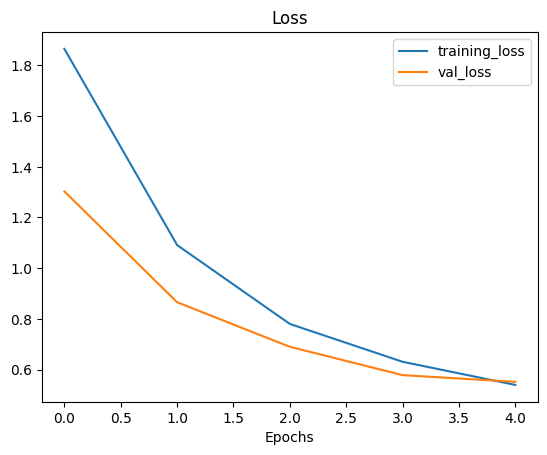

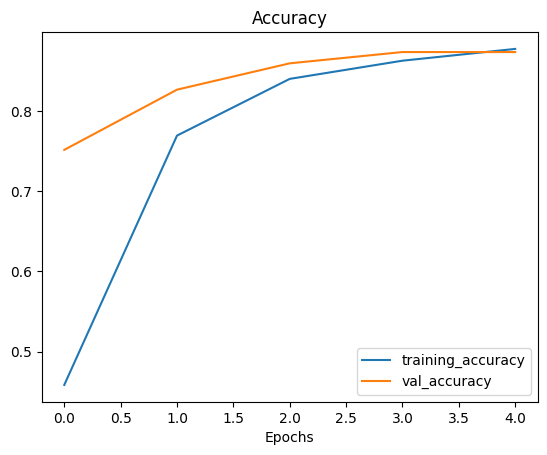

In [12]:
# let's plot loss curves
plot_loss_curves(hist_0)

In [13]:
# check on model
model_0.summary()

Model: "first_model_Function_Api"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 golobal_avg_pooling_layer   (None, 1280)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________

In [14]:
# check on layers in pretrained model
for layer_num, layer in enumerate(base_model.layers):
  print(f"{layer_num}: {layer.name}")

# U will found in layer 2 there are rescaling layer

0: input_1
1: rescaling
2: normalization
3: rescaling_1
4: stem_conv_pad
5: stem_conv
6: stem_bn
7: stem_activation
8: block1a_dwconv
9: block1a_bn
10: block1a_activation
11: block1a_se_squeeze
12: block1a_se_reshape
13: block1a_se_reduce
14: block1a_se_expand
15: block1a_se_excite
16: block1a_project_conv
17: block1a_project_bn
18: block2a_expand_conv
19: block2a_expand_bn
20: block2a_expand_activation
21: block2a_dwconv_pad
22: block2a_dwconv
23: block2a_bn
24: block2a_activation
25: block2a_se_squeeze
26: block2a_se_reshape
27: block2a_se_reduce
28: block2a_se_expand
29: block2a_se_excite
30: block2a_project_conv
31: block2a_project_bn
32: block2b_expand_conv
33: block2b_expand_bn
34: block2b_expand_activation
35: block2b_dwconv
36: block2b_bn
37: block2b_activation
38: block2b_se_squeeze
39: block2b_se_reshape
40: block2b_se_reduce
41: block2b_se_expand
42: block2b_se_excite
43: block2b_project_conv
44: block2b_project_bn
45: block2b_drop
46: block2b_add
47: block3a_expand_conv
48:

## Downloading data which is 1% percent of data

In [15]:
# download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

# Let's unzip data
unzip_data('10_food_classes_1_percent.zip')

--2023-09-15 18:11:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  43.1MB/s    in 3.0s    

2023-09-15 18:11:34 (43.1 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



### Prepare that Data for model_1

In [16]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# create test and train dir
train_dir = '10_food_classes_1_percent/train/'
test_dir = '10_food_classes_1_percent/test/'

# Setup loader and load our data
train_data_1_percent = image_dataset_from_directory(
    directory = train_dir,
    label_mode = 'categorical',
    image_size = IMG_SHAPE,
    batch_size = BATCH_SIZE)

test_data = image_dataset_from_directory(
    directory = test_dir,
    label_mode = 'categorical',
    image_size = IMG_SHAPE,
    batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Building data augmentaion layer inside our model

In [17]:
# import dependecies
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import Sequential

# create data aug stage
data_aug = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescaling(1.0/255),
], name='data_aug_layer')

### View Our images and iamge_aug

In [18]:
# view image and compare it with augmanted

## Creating Our model_1 which with 1% percentage form data

In [19]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Input
from tensorflow.keras import Model

# create base_model
base_model = EfficientNetB0(include_top = False)

# Freezze base model
base_model.trainable = False

# creat input layer
inputs = Input(shape = (224, 224, 3), name='input_layer')

# Add inputs in data_aug
x = data_aug(inputs)

# give data after augmentaed it to base model
x = base_model(x, training= False)

# crate global avg layuer
x = GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)

# create output layer
outputs = Dense(10, activation='softmax', name='output_layer')(x)

# Make model
model_1 = Model(inputs, outputs)

# compile model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit model
hist_1 = model_1.fit(train_data_1_percent,
                     epochs = 5,
                     steps_per_epoch = len(train_data_1_percent),
                     validation_data = test_data,
                     validation_steps = (0.25*len(test_data)),
                     # Track our model's training logs for visualization later
                     callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_feature_extract")])

Saving TensorBoard log files to: transfer_learning/1_percent_feature_extract/20230915-181139
Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.4342 - accuracy: 0.1429 - val_loss: 2.2181 - val_accuracy: 0.1813
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1606 - accuracy: 0.2429 - val_loss: 2.0980 - val_accuracy: 0.2875
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 1.9693 - accuracy: 0.3714 - val_loss: 1.9798 - val_accuracy: 0.3781
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7847 - accuracy: 0.5286 - val_loss: 1.8865 - val_accuracy: 0.4328
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6406 - accuracy: 0.5286 - val_loss: 1.7826 - val_accuracy: 0.5047


In [20]:
# check on all test data
model_1.evaluate(test_data)

79/79 [==============================] - 6s 66ms/step - loss: 1.7953 - accuracy: 0.4840


[1.7952783107757568, 0.48399999737739563]

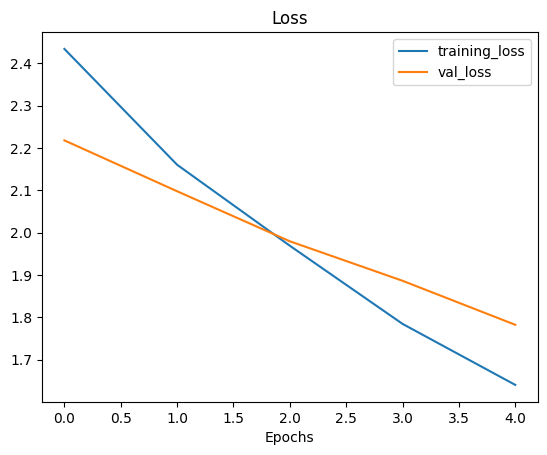

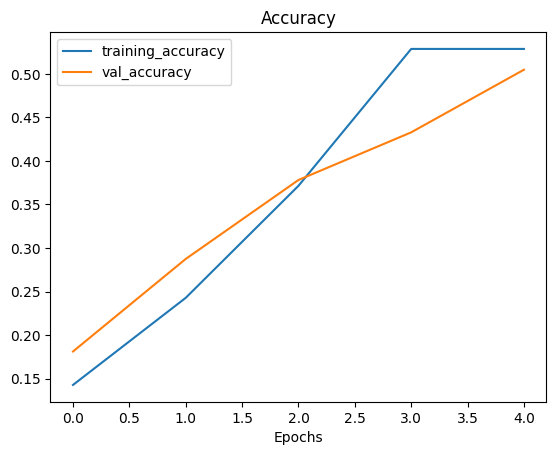

In [21]:
# plot loss curves
plot_loss_curves(hist_1)

## Creating Our model_2 which with 10% percentage from data

In [22]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Input
from tensorflow.keras import Model

# create base_model
base_model = EfficientNetB0(include_top = False)

# Freezze base model
base_model.trainable = False

# creat input layer
inputs = Input(shape = (224, 224, 3), name='input_layer')

# Add inputs in data_aug
x = data_aug(inputs)

# give data after augmentaed it to base model
x = base_model(x, training= False)

# crate global avg layuer
x = GlobalAveragePooling2D(name='global_avg_pooling_layer')(x)

# create output layer
outputs = Dense(10, activation='softmax', name='output_layer')(x)

# Make model
model_2 = Model(inputs, outputs)

## Creating ModelCheckpoint callback
which will save our weigths of model or saving the whole model

In [23]:
# Set path of checkpoint dir
checkpoint_dir = '10_percent_checkpoints_weights/chkpoints.ckpt'

# Create model checkpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_dir,
                                                         save_best_only = False,
                                                         save_weights_only  = True,
                                                         save_freq='epoch' # Saving each epoch
                                                         )

## compile and fitting model_2 with ModelCheckpoint callback


In [24]:
init_epochs = 5

# compile model
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit model
hist_10_percent_data_aug = model_2.fit(train_data_10_percent,
                     epochs = init_epochs,
                     steps_per_epoch = len(train_data_10_percent),
                     validation_data = test_data,
                     validation_steps = (0.25*len(test_data)),
                     # Track our model's training logs for visualization later
                     callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract_augmanted_Model_chkpoints"),
                                checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract_augmanted_Model_chkpoints/20230915-181227
Epoch 1/5
24/24 [==============================] - 24s 682ms/step - loss: 1.9785 - accuracy: 0.3667 - val_loss: 1.4328 - val_accuracy: 0.6797
Epoch 2/5
24/24 [==============================] - 12s 500ms/step - loss: 1.2899 - accuracy: 0.7213 - val_loss: 0.9967 - val_accuracy: 0.7875
Epoch 3/5
24/24 [==============================] - 13s 545ms/step - loss: 0.9839 - accuracy: 0.7667 - val_loss: 0.7920 - val_accuracy: 0.8281
Epoch 4/5
24/24 [==============================] - 12s 497ms/step - loss: 0.8462 - accuracy: 0.7880 - val_loss: 0.6851 - val_accuracy: 0.8469
Epoch 5/5
24/24 [==============================] - 11s 465ms/step - loss: 0.7094 - accuracy: 0.8307 - val_loss: 0.6266 - val_accuracy: 0.8484


In [25]:
# Evaluate on full test_daat
res_10_percent_data_aug_modelcheckpoint = model_2.evaluate(test_data)
res_10_percent_data_aug_modelcheckpoint

79/79 [==============================] - 6s 68ms/step - loss: 0.6290 - accuracy: 0.8436


[0.6290099620819092, 0.8435999751091003]

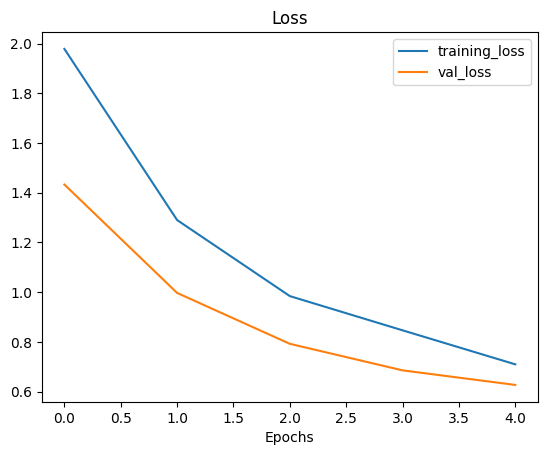

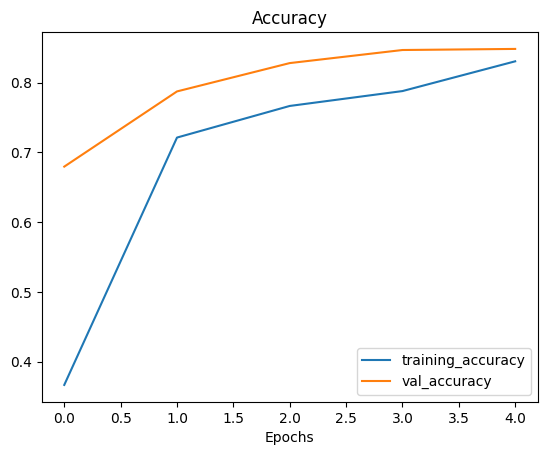

In [26]:
# Show loass curves
plot_loss_curves(hist_10_percent_data_aug)

## Load weigths that Saved then compare it

In [27]:
# Load weights
model_2.load_weights(checkpoint_dir)

In [28]:
# Evaluate on test data
res_10_percent_data_aug_loadedweights = model_2.evaluate(test_data)
res_10_percent_data_aug_loadedweights

79/79 [==============================] - 7s 78ms/step - loss: 0.6290 - accuracy: 0.8436


[0.6290099024772644, 0.8435999751091003]

In [29]:
import numpy as np

# Compare two evaluation on test data
np.isclose(np.array(res_10_percent_data_aug_modelcheckpoint), np.array(res_10_percent_data_aug_loadedweights))

array([ True,  True])

In [30]:
res_10_percent_data_aug_modelcheckpoint, res_10_percent_data_aug_loadedweights

([0.6290099620819092, 0.8435999751091003],
 [0.6290099024772644, 0.8435999751091003])

## Let's prepare model_3 with (fine tuning)

In [31]:
# Let's check on base_model layers trainable
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

### Make last 10 layers is trainable

In [32]:
# Let's change Last 10 layer and make them trainable is True
# 1. change all to True
base_model.trainable = True

# 2. Loop on all layers and make frozen for all except last 10 layers
for layer in base_model.layers[:-10] :
  layer.trainable = False

### Recompile then fitting our model again (featue_extraction) model

In [33]:
# compile model
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), # Must with fine tuning decraes by *10 lr
                metrics=['accuracy'])

# Let's show all trainable  layers in base_model
# Let's check on base_model layers trainable
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

### Fitting Our model (fine_tuning)

In [34]:
# # Fine tune for another 5 epochs
# fine_tune_epochs = init_epochs + 5

# # Refit the model (same as model_2 except with more trainable layers)
# history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
#                                                epochs=fine_tune_epochs,
#                                                validation_data=test_data,
#                                                initial_epoch=hist_10_percent_data_aug.epoch[-1], # start from previous last epoch
#                                                validation_steps=int(0.25 * len(test_data)),
#                                                callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

In [35]:
# check on why add hist_2.epoch[-1]
hist_10_percent_data_aug.epoch[-1]

4

In [36]:
# # Evaluate on that model
# res_fine_tune_10_percent = model_2.evaluate(test_data)
# res_fine_tune_10_percent

## Let's Make Function That compare Histories

In [37]:
import matplotlib.pyplot as plt

def compare_histories(original_hist, new_hist, init_epochs = 5):
  """
  Compares two model history objects.
  """
  # Get original history measurements
  acc = original_hist.history["accuracy"]
  loss = original_hist.history["loss"]

  print(len(acc))

  val_acc = original_hist.history["val_accuracy"]
  val_loss = original_hist.history["val_loss"]

  # Combine original history with new history
  total_acc = acc + new_hist.history["accuracy"]
  total_loss = loss + new_hist.history["loss"]

  total_val_acc = val_acc + new_hist.history["val_accuracy"]
  total_val_loss = val_loss + new_hist.history["val_loss"]

  # Make plots
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([init_epochs-1, init_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([init_epochs-1, init_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

### Comapring hist of data_aug(feature_extraction) with hist of fine tuning

In [38]:
# # Let's compare new_hist with prevoius hist
# compare_histories(original_hist=hist_10_percent_data_aug,
#                   new_hist=history_fine_10_percent_data_aug)

## Let's Downloadinga and preperaing data for our Biggest model (model_4)

In [39]:
# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data('10_food_classes_all_data.zip')

--2023-09-15 18:14:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  67.6MB/s    in 7.8s    

2023-09-15 18:14:14 (63.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [40]:
# Setup test and train directories
train_dir_full_data = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

# load our data
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data_full_precent = image_dataset_from_directory(
    train_dir_full_data,
    label_mode = 'categorical',
    image_size = IMG_SHAPE,
    batch_size = BATCH_SIZE
)

test_data = image_dataset_from_directory(
    test_dir,
    label_mode = 'categorical',
    image_size = IMG_SHAPE,
    batch_size = BATCH_SIZE
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [41]:
# # Create a new instance of model_2 for Experiment 4
# model_2 = base_model(learning_rate=0.0001) # 10x lower learning rate for fine-tuning

### Prepare Our model experiments

In [42]:
# we need to retrive model_2 weights which as before last fine tuning
# So. Let's load data from modelchkpoint
model_2.load_weights(checkpoint_dir)

# Let's Check on it
loaded_weights = model_2.evaluate(test_data)

# Check with numpy
import numpy as np
np.isclose(np.array(loaded_weights),np.array(res_10_percent_data_aug_modelcheckpoint))

79/79 [==============================] - 10s 87ms/step - loss: 0.6290 - accuracy: 0.8436


array([ True,  True])

In [43]:
# Let's check on base_model layers trainable
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

### Recompile and fitting model


In [46]:
# Epochs for fine tuning
fine_tune_epochs = init_epochs + 5

# compile model
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit model
hist_full_percent_data_fine_tuning = model_2.fit(train_data_full_precent,
                     epochs = fine_tune_epochs,
                     steps_per_epoch = len(train_data_full_precent),
                     validation_data = test_data,
                     validation_steps = (0.25*len(test_data)),
                     initial_epoch = hist_10_percent_data_aug.epoch[-1], # start from previous last epoch
                     # Track our model's training logs for visualization later
                     callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tuning_full_data")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuning_full_data/20230915-181839
Epoch 5/10
235/235 [==============================] - 88s 333ms/step - loss: 0.5629 - accuracy: 0.8192 - val_loss: 0.2785 - val_accuracy: 0.9172
Epoch 6/10
235/235 [==============================] - 64s 273ms/step - loss: 0.4006 - accuracy: 0.8699 - val_loss: 0.2706 - val_accuracy: 0.9234
Epoch 7/10
235/235 [==============================] - 64s 271ms/step - loss: 0.3088 - accuracy: 0.9011 - val_loss: 0.2610 - val_accuracy: 0.9016
Epoch 8/10
235/235 [==============================] - 54s 228ms/step - loss: 0.2646 - accuracy: 0.9075 - val_loss: 0.2959 - val_accuracy: 0.9125
Epoch 9/10
235/235 [==============================] - 48s 204ms/step - loss: 0.2150 - accuracy: 0.9289 - val_loss: 0.3421 - val_accuracy: 0.9000
Epoch 10/10
235/235 [==============================] - 45s 190ms/step - loss: 0.1816 - accuracy: 0.9407 - val_loss: 0.2937 - val_accuracy: 0.9094


### Evaluate our Best Model

In [47]:
# Evaluate
model_2.evaluate(test_data)

79/79 [==============================] - 8s 93ms/step - loss: 0.3228 - accuracy: 0.9068


[0.3228453993797302, 0.9067999720573425]

5


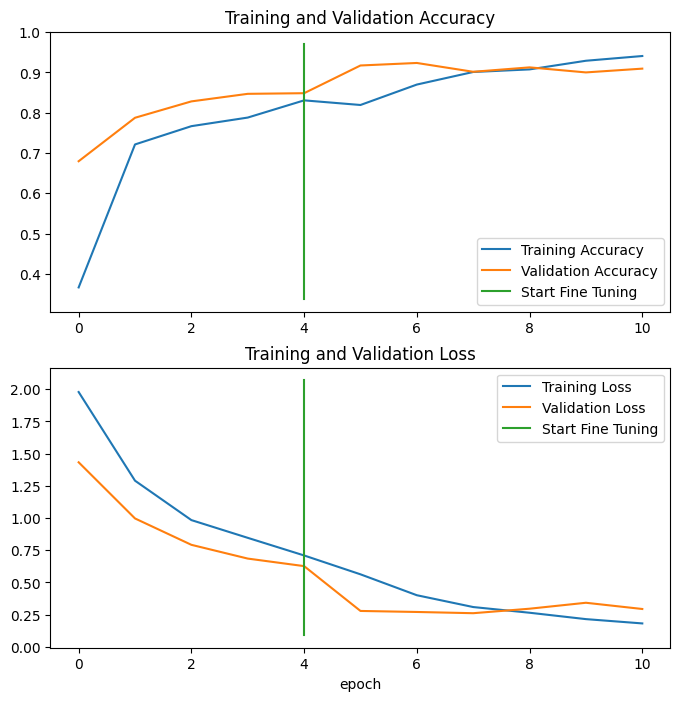

In [48]:
# # Let's compare new_hist with prevoius hist
compare_histories(original_hist=hist_10_percent_data_aug,
                  new_hist=hist_full_percent_data_fine_tuning)

## Let's Upload all of that on tensorboard and show which is better

In [50]:
# Upload on tensorboard
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot # exits the uploader when upload has finished

2023-09-15 18:26:39.308817: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   CYK-TGG-WSV



New experiment created. View your TensorBoard at: https://tensorboard.dev/